# Import Libraries & Data

In [3]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

# import datasets
books = pd.read_csv('Top-100 Trending Books.csv')
reviews = pd.read_csv('customer reviews.csv')

# Preview Data

In [4]:
# preview the data
books.head()

,Rank,book title,book price,rating,author,year of publication,genre,url
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,amazon.com/Friends-Lovers-Big-Terrible-Thing/d...
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...


In [5]:
# data types
books.dtypes

Rank                     int64
book title              object
book price             float64
rating                 float64
author                  object
year of publication      int64
genre                   object
url                     object
dtype: object

In [6]:
# inspect dataset for missing or incorrect data
books.info()
books.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 100 non-null    int64  
 1   book title           100 non-null    object 
 2   book price           100 non-null    float64
 3   rating               97 non-null     float64
 4   author               100 non-null    object 
 5   year of publication  100 non-null    int64  
 6   genre                100 non-null    object 
 7   url                  100 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


,Rank,book price,rating,year of publication
count,100.000000,100.000000,97.000000,100.00000
mean,50.500000,12.708600,4.689691,2013.76000
std,29.011492,7.915568,0.181133,15.13049
min,1.000000,2.780000,4.100000,1947.00000
25%,25.750000,6.302500,4.600000,2014.00000
50%,50.500000,11.480000,4.700000,2019.00000
75%,75.250000,16.990000,4.800000,2023.00000
max,100.000000,48.770000,5.000000,2024.00000


### Insight
There are 100 books in the list, but only 97 have ratings. This would indiciate that 3 of these books are pre-orders (have not been released yet). This can also be seen in the max year of publication being 2024 (as it is currently 2023).

# Clean Data

In [7]:
# fix column names to all be lowercase
column_mapper = {
    'Rank':'rank'
}
books = books.rename(
    mapper = column_mapper,
    axis = 1
)
books.head()

,rank,book title,book price,rating,author,year of publication,genre,url
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,amazon.com/Friends-Lovers-Big-Terrible-Thing/d...
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...


In [8]:
# drop unnecessary columns
drop_columns = ['url']
books = books.drop(
    labels = drop_columns,
    axis = 1
)
books.head()

,rank,book title,book price,rating,author,year of publication,genre
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction"


In [9]:
# make genre title case
books['genre'] = books['genre'].str.title()
books.head()

,rank,book title,book price,rating,author,year of publication,genre
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction"


# Understanding the Data

## Top Genres

In [10]:
# Trending Books by Genre
books['genre'].describe()

count            100
unique            78
top       Nonfiction
freq               6
Name: genre, dtype: object

In [11]:
# Count Trending Books by Genre
genre_counts = books['genre'].value_counts()
genre_counts.head()

genre
Nonfiction               6
Childrens, Literature    5
Childrens                4
Fantasy                  3
Memoir                   3
Name: count, dtype: int64

<Axes: title={'center': 'Top Genres in Trending Books List'}, xlabel='Count of Books in Genre', ylabel='Genre'>

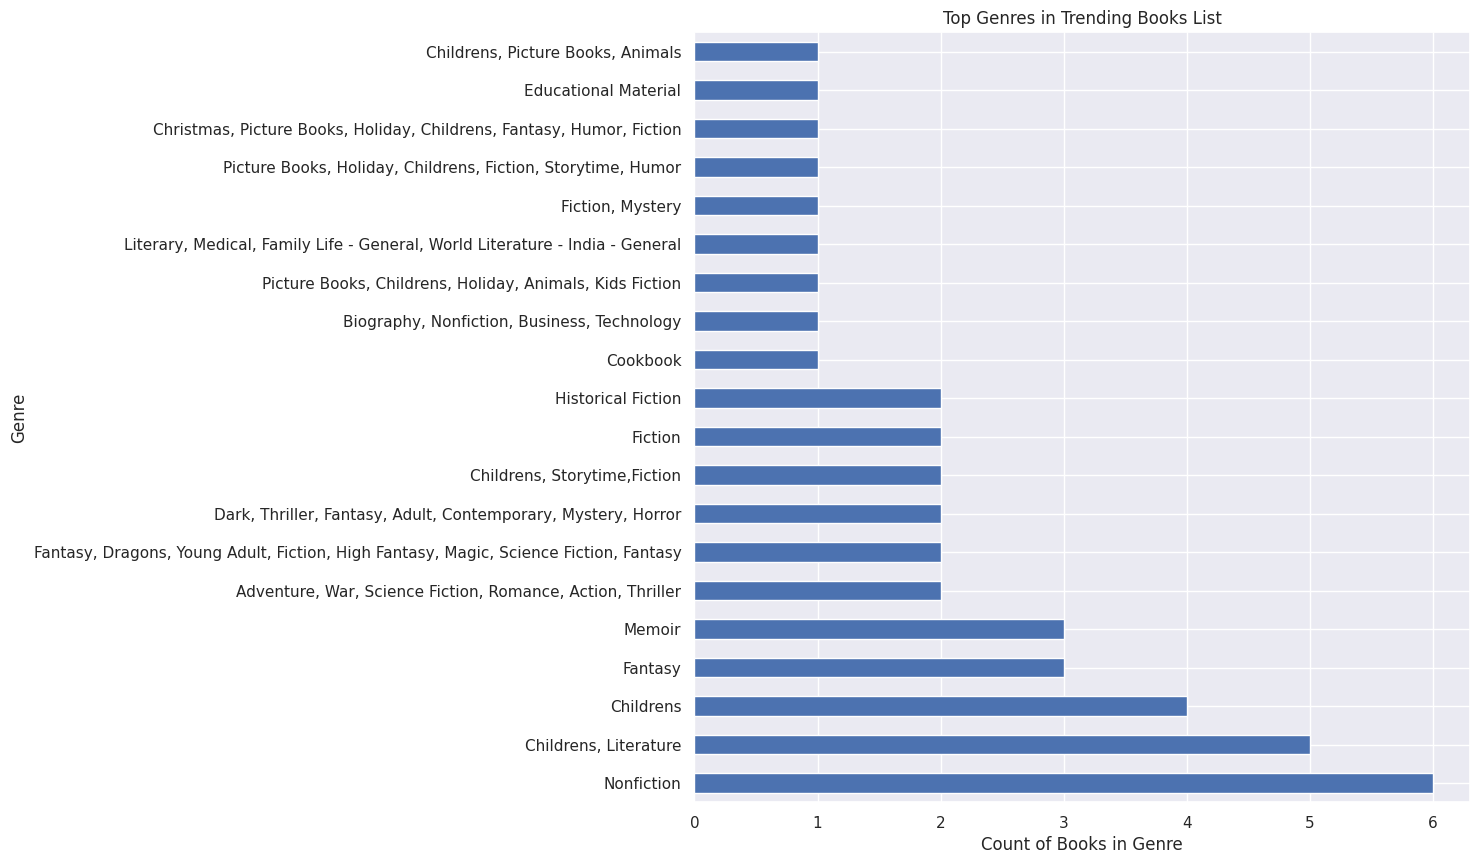

In [12]:
books['genre'].value_counts()[:20].plot(
    kind = 'barh',
    title = 'Top Genres in Trending Books List',
    ylabel = 'Genre',
    xlabel = 'Count of Books in Genre',
    figsize = (10,10)
)

### Insight
While this graph is interesting, it could be more helpful. As we learned above, there are 78 unique genres on this list of 100 books. If we could condense these genres down to something more high-level, I think this graph could actually be more telling. 

There's a couple ways we could go about this. The first one I am going to try is making a high-level genre column where I level up the genres. First I am going to split the columns by delimiter so I can get the primary genre (in lists where there are multiple genres listed). Then I am going to up-level this genre.

If that doesn't produce something interesting, then I will add additional columns for books that are considered multi genre.

In [13]:
# split genre column by delimiter and save first entry as primary genre
loc_split = books['genre'].str.split(
    pat=',', 
    expand=True)

books['primary genre'] = loc_split[0]

books['primary genre'].describe()

count           100
unique           31
top       Childrens
freq             16
Name: primary genre, dtype: object

In [14]:
## summarizing primary genre 
# create a list of our conditions
conditions = [
    (books['primary genre'].str.contains('Fantasy|Dragons|Fantasy Romance',regex = True)),
    (books['primary genre'].str.contains('Fiction|Adventure|Young Adult|Literary',regex = True) | books['primary genre'].str.match('Romance')),
    (books['primary genre'].str.contains('Nonfiction|Memoir|Autobiography|Self-Improvement|Self Help|Biography|History|Health|Finance',regex = True)),
    (books['primary genre'].str.contains('Childrens',regex = True)),
    (books['primary genre'].str.contains('Picture Book',regex = True)),
    (books['primary genre'].str.contains('Humor',regex = True)),
    (books['primary genre'].str.contains('Educational Material',regex = True)),
    (books['primary genre'].str.contains('Cookbook',regex = True)),
    (books['primary genre'].str.contains('Thriller|Dark',regex = True)),
    (books['primary genre'].str.contains('Spiritual',regex = True)),
    (books['primary genre'].str.contains('Christmas',regex = True))
]


# create a list of the values we want to assign for each condition
values = ['Fantasy',
          'Fiction', 
          'Nonfiction', 
          'Childrens', 
          'Picture Book', 
          'Humor', 
          'Educational Material', 
          'Cookbook',
          'Thriller',
          'Spiritual',
          'Holiday'
]

# create a new column and use np.select to assign values to it using our lists as arguments
books['summarized genre'] = np.select(conditions, values, default = 'None')

# display updated DataFrame
books.head()

,rank,book title,book price,rating,author,year of publication,genre,primary genre,summarized genre
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,Fantasy Romance,Fantasy
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,Memoir,Nonfiction
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,Autobiography,Nonfiction
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,Memoir,Nonfiction
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",Childrens,Childrens


In [15]:
# check to make sure all genres are accounted for and nothing is labeled "None"
books['summarized genre'].value_counts()

summarized genre
Nonfiction              26
Childrens               18
Fiction                 16
Picture Book            16
Fantasy                 10
Thriller                 5
Spiritual                2
Holiday                  2
Educational Material     2
Cookbook                 2
Humor                    1
Name: count, dtype: int64

In [16]:
## find where summarized genre is still blank. Table will appear blank if everything is correct!
# create boolean to check for nulls
summarized_genre_none = (books['summarized genre'] == 'None')

# display where column is null
books[summarized_genre_none]

,rank,book title,book price,rating,author,year of publication,genre,primary genre,summarized genre


Now that we have created a summarized genre column, lets run the original analysis again and see where it lands.

[Text(0, 0, '26'),
 Text(0, 0, '18'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '10'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

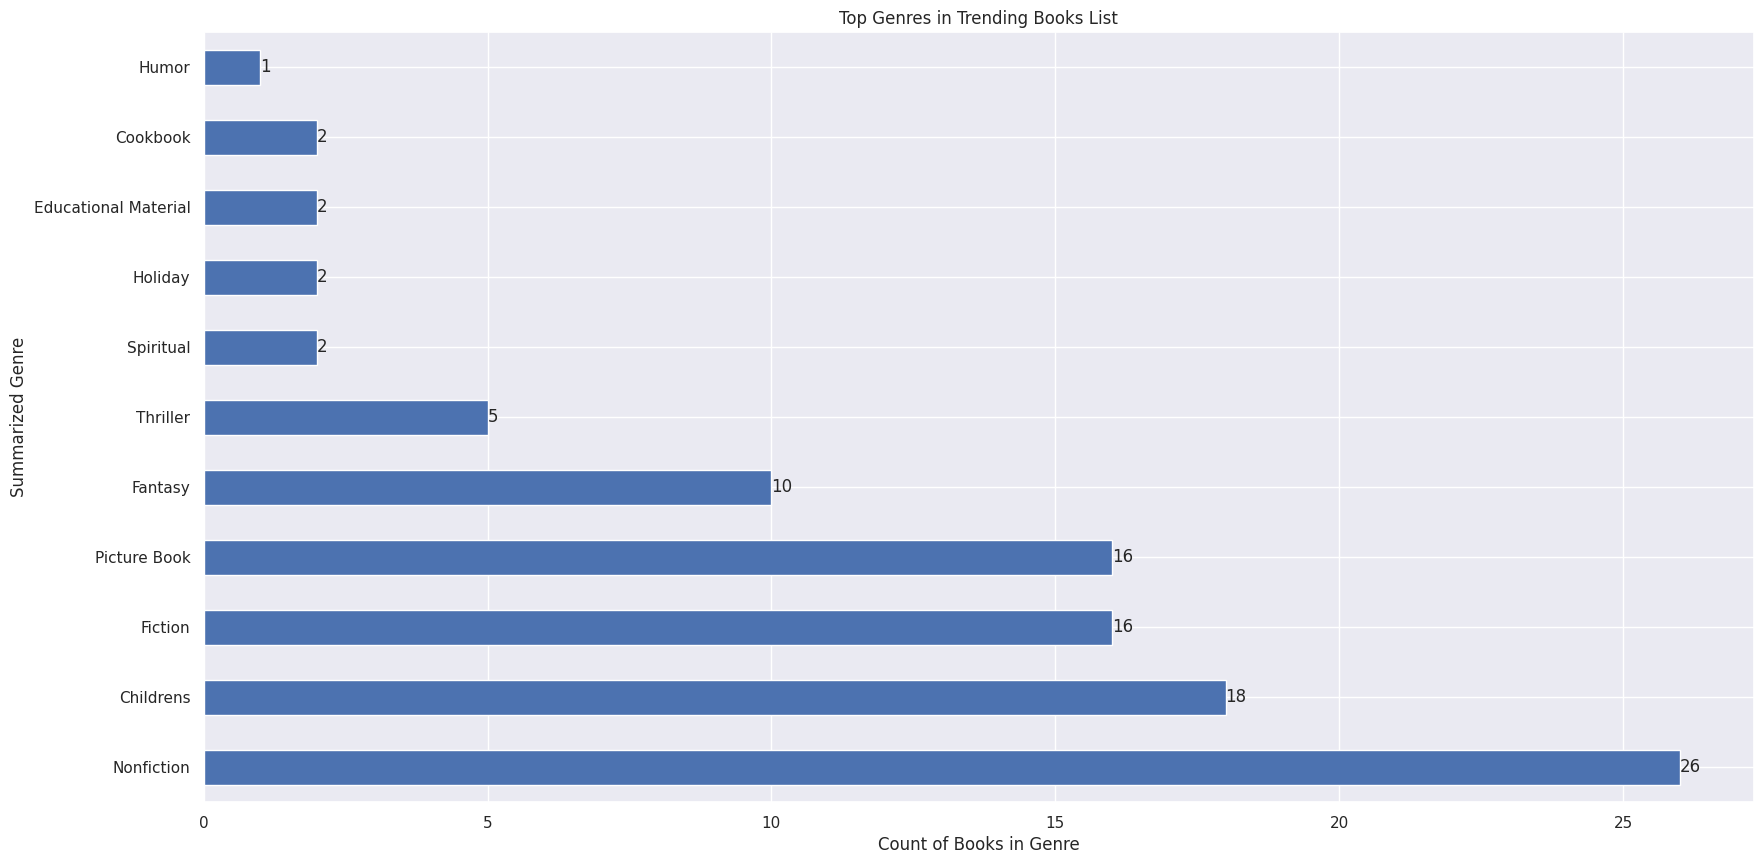

In [17]:
# visualize genre counts
genre_barplot = books['summarized genre'].value_counts().plot(
    kind = 'barh',
    title = 'Top Genres in Trending Books List',
    ylabel = 'Summarized Genre',
    xlabel = 'Count of Books in Genre',
    figsize = (20,10)
)

# add bar labels
genre_barplot.bar_label(genre_barplot.containers[0])

From this chart, we can tell that the main genres on this Trending List include: Nonfiction, Childrens, Fiction, Picture Book, and Fantasy. From here, I'd like to know what the spread of ratings looks like for these genres.

In [18]:
# create fantasy book table
is_fantasy = (books['summarized genre'] == 'Fantasy')

fantasy_books = books[is_fantasy]

fantasy_books.head(20)




,rank,book title,book price,rating,author,year of publication,genre,primary genre,summarized genre
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,Fantasy Romance,Fantasy
5,6,"Fourth Wing (The Empyrean, 1)",16.99,4.8,Rebecca Yarros,2023,Fantasy,Fantasy,Fantasy
22,23,A Court of Thorns and Roses (A Court of Thorns...,8.89,4.6,Sarah J. Maas,2015,"Fantasy, Romance, Young Adult, Fiction, New Ad...",Fantasy,Fantasy
24,25,"House of Flame and Shadow (Crescent City, 3)",18.48,NaN,Sarah J. Maas,2023,"Fantasy, Dragons, Young Adult, Fiction, High F...",Fantasy,Fantasy
28,29,Murtagh: The World of Eragon (The Inheritance ...,22.48,4.8,Christopher Paolini,2023,"Fantasy, Dragons, Young Adult, Fiction, High F...",Fantasy,Fantasy
46,47,A Court of Thorns and Roses Paperback Box Set ...,48.77,4.8,Sarah J. Maas,2021,"Fantasy, Romance",Fantasy,Fantasy
71,72,A Court of Mist and Fury (A Court of Thorns an...,12.79,4.8,Sarah J. Maas,2016,"Fantasy, Romance, Young Adult, New Adult, Fiction",Fantasy,Fantasy
87,88,A Court of Wings and Ruin (A Court of Thorns a...,11.56,4.8,Sarah J. Maas,2017,Fantasy,Fantasy,Fantasy
89,90,Harry Potter and the Prisoner of Azkaban (Harr...,25.97,4.9,J.K. Rowling,1999,Fantasy,Fantasy,Fantasy
93,94,Percy Jackson and the Olympians: The Chalice o...,15.63,4.7,Rick Riordan,2023,"Fantasy, Adventure, Mythology",Fantasy,Fantasy


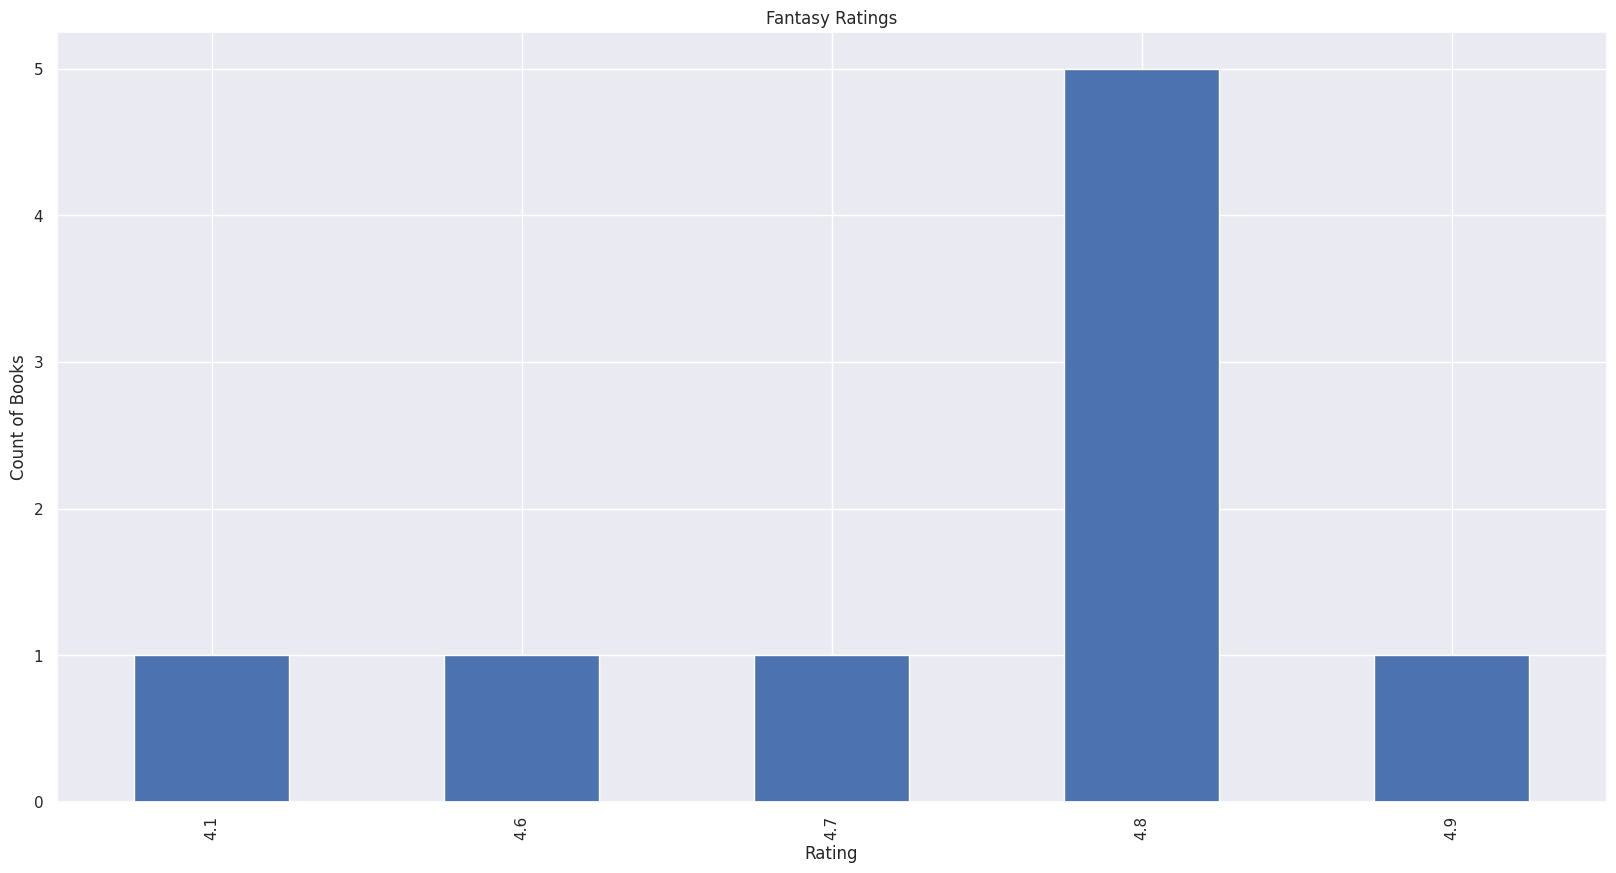

In [19]:
# fantasy bar plot
fantasy_rating_barplot = fantasy_books['rating'].sort_values().value_counts(sort = False).plot(
    kind = 'bar',
    title = 'Fantasy Ratings',
    ylabel = 'Count of Books',
    xlabel = 'Rating',
    figsize = (20,10)
)


# add horizontal line at mean value of y
# plt.axhline(y=np.nanmean(fantasy_books['rating']), color = 'red', linestyle = '--', linewidth = 3, label = 'Avg')

In [20]:
# pivot the data to see what the spread looks like

genre_rating_pivot = pd.pivot_table(
    books,
    index = 'rating',
    columns = 'summarized genre',
    values = 'book title',
    aggfunc = 'count'
)

genre_rating_pivot = genre_rating_pivot.reset_index()

genre_rating_pivot

summarized genre,rating,Childrens,Cookbook,Educational Material,Fantasy,Fiction,Holiday,Humor,Nonfiction,Picture Book,Spiritual,Thriller
0,4.1,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,4.3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
3,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0
4,4.5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,NaN,1.0,1.0
5,4.6,2.0,NaN,NaN,1.0,6.0,1.0,NaN,6.0,1.0,1.0,1.0
6,4.7,NaN,NaN,1.0,1.0,1.0,NaN,NaN,9.0,4.0,NaN,1.0
7,4.8,9.0,2.0,1.0,5.0,NaN,1.0,1.0,2.0,6.0,NaN,NaN
8,4.9,7.0,NaN,NaN,1.0,2.0,NaN,NaN,1.0,5.0,NaN,NaN
9,5.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# use groupby to make genre rating table
genre_rating = books.groupby(['rating', 'summarized genre']).agg(
    {'book title':'count'}
)
genre_rating.columns = ['count of books']

genre_rating = genre_rating.reset_index()

genre_rating

,rating,summarized genre,count of books
0,4.1,Fantasy,1
1,4.1,Fiction,1
2,4.2,Thriller,1
3,4.3,Fiction,1
4,4.3,Nonfiction,1
5,4.4,Nonfiction,3
6,4.4,Thriller,1
7,4.5,Fiction,3
8,4.5,Nonfiction,3
9,4.5,Spiritual,1


In [23]:
# SEABORN PLOT
# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data = genre_rating,
    #kind =
    x = "rating", 
    y = "count of books", 
    col = "summarized genre",
    hue = "smoker", 
    style = "smoker", 
    size = "size"
)

ValueError: Could not interpret value `smoker` for `hue`. An entry with this name does not appear in `data`.

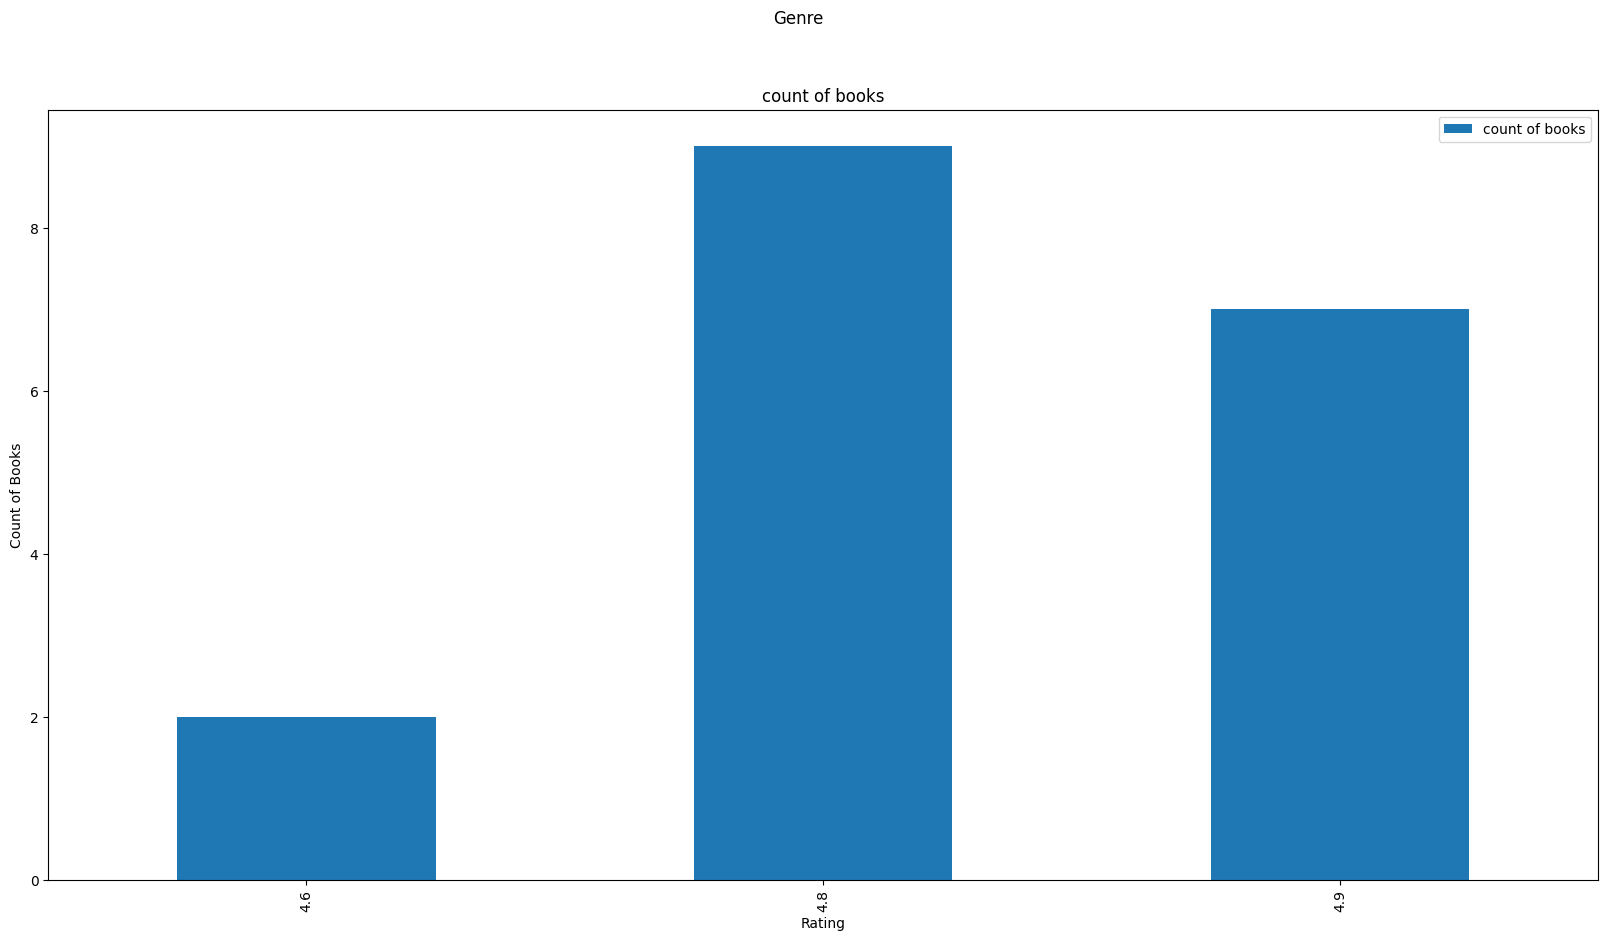

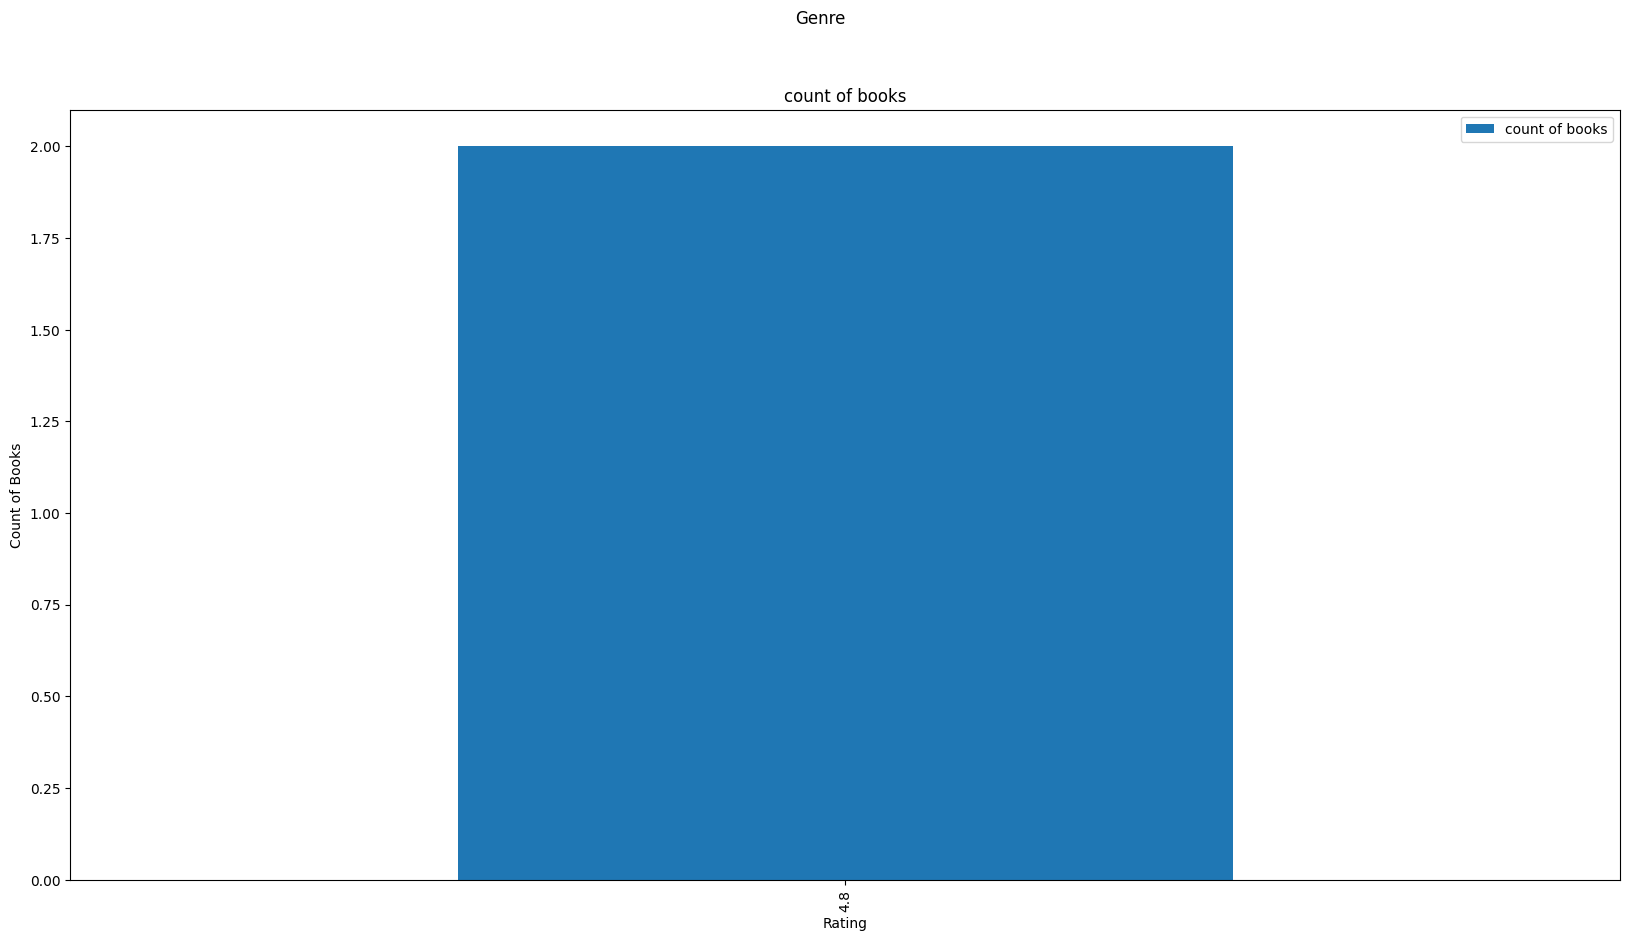

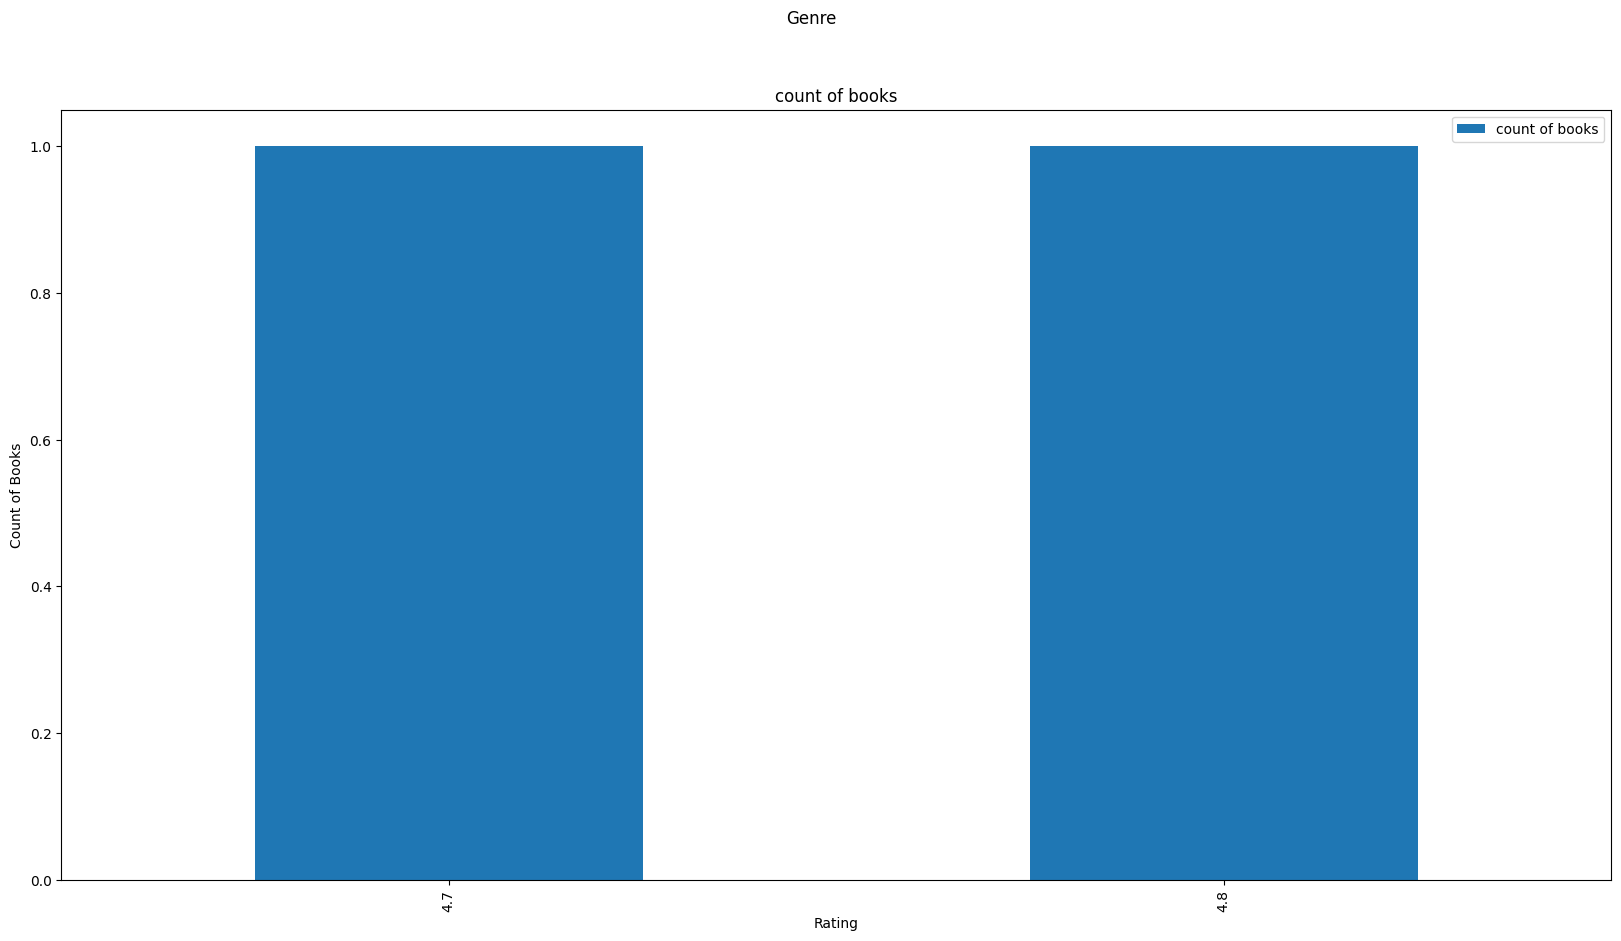

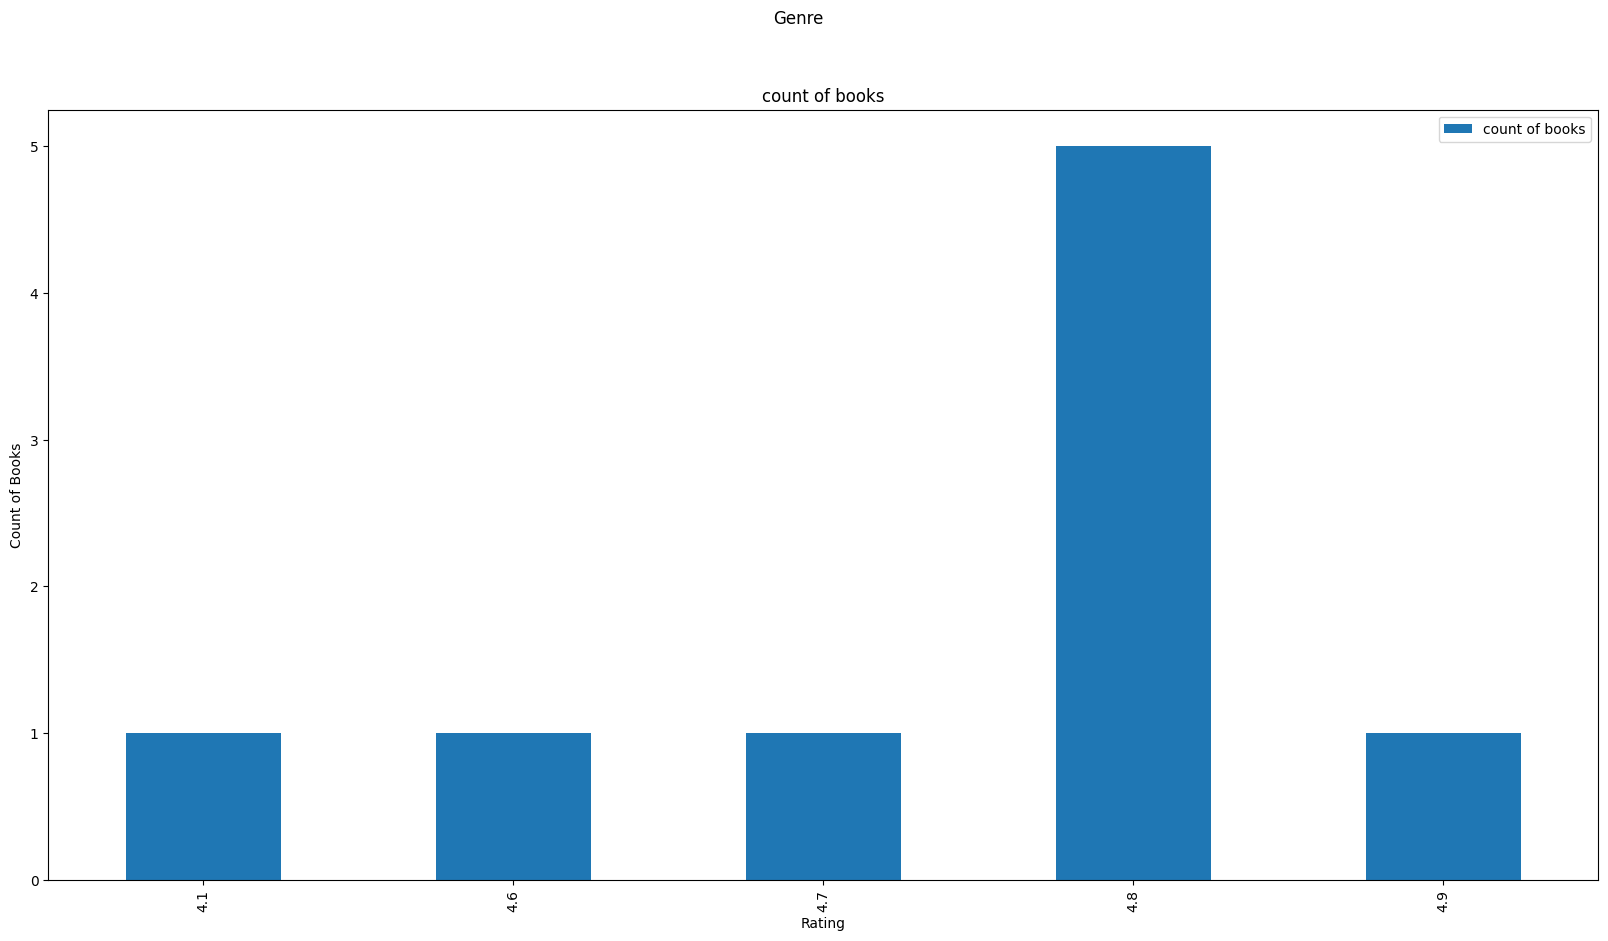

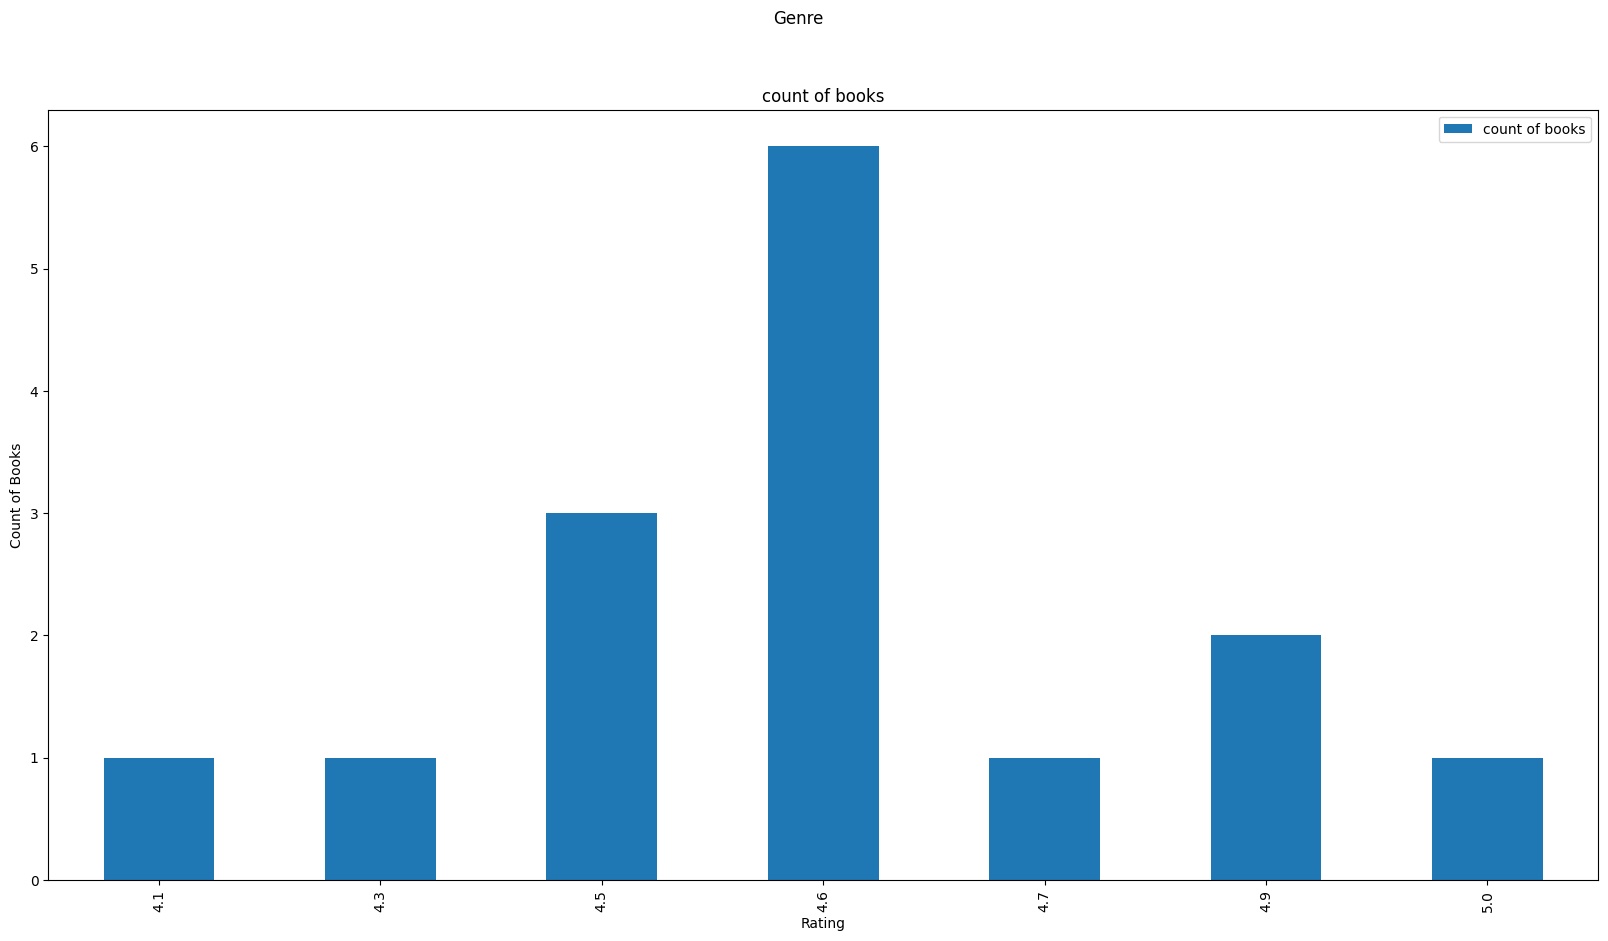

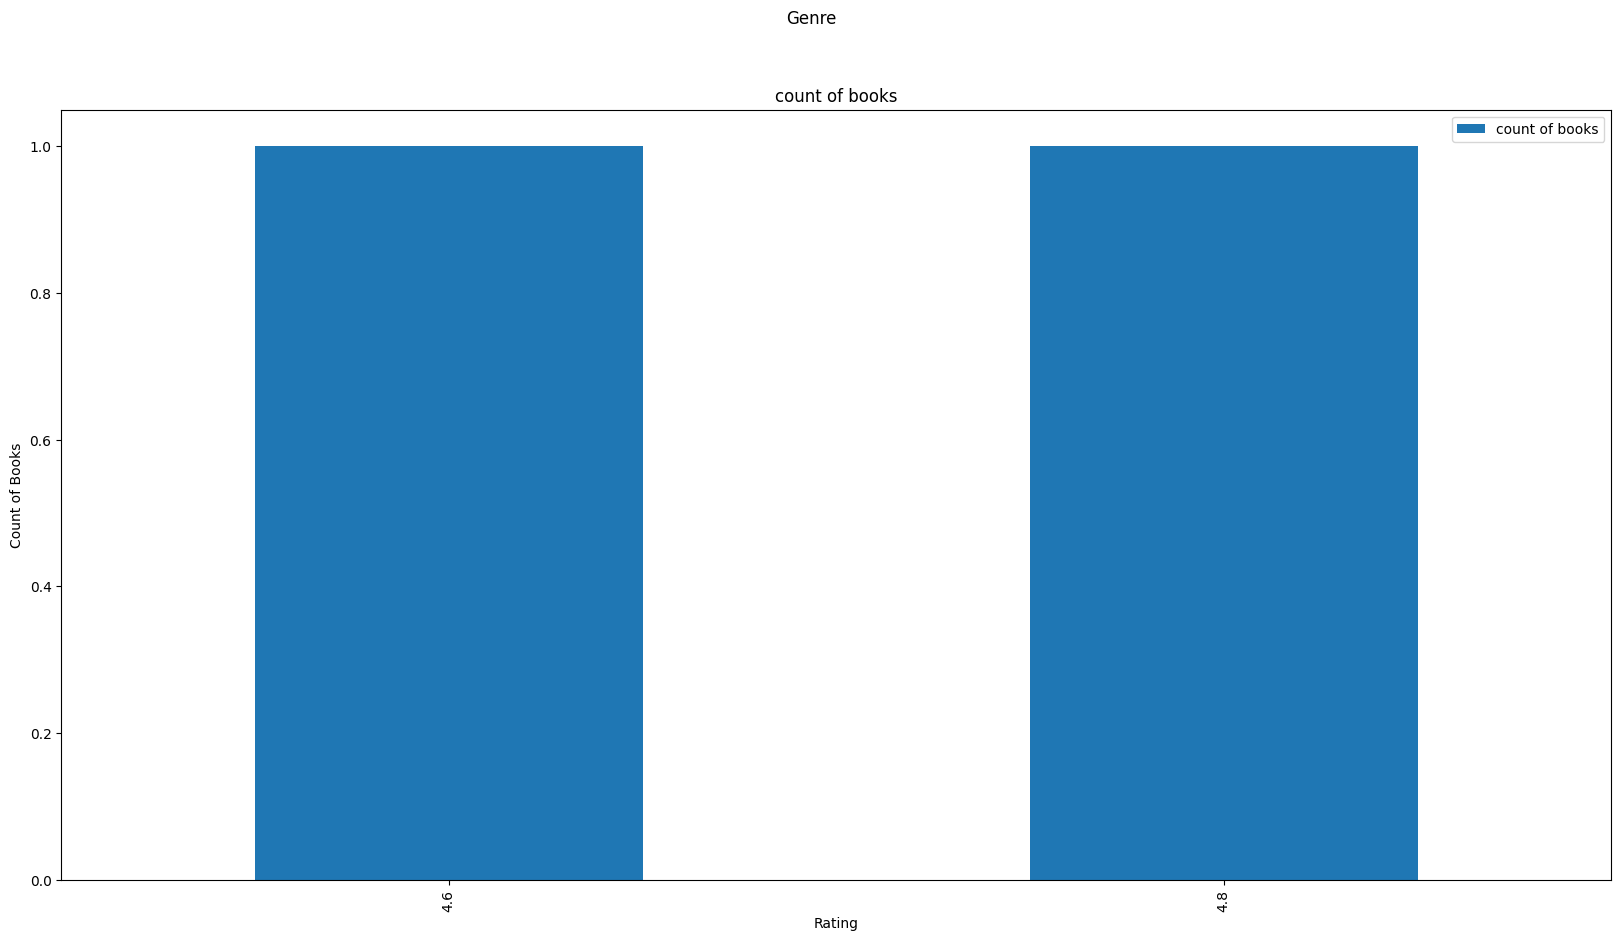

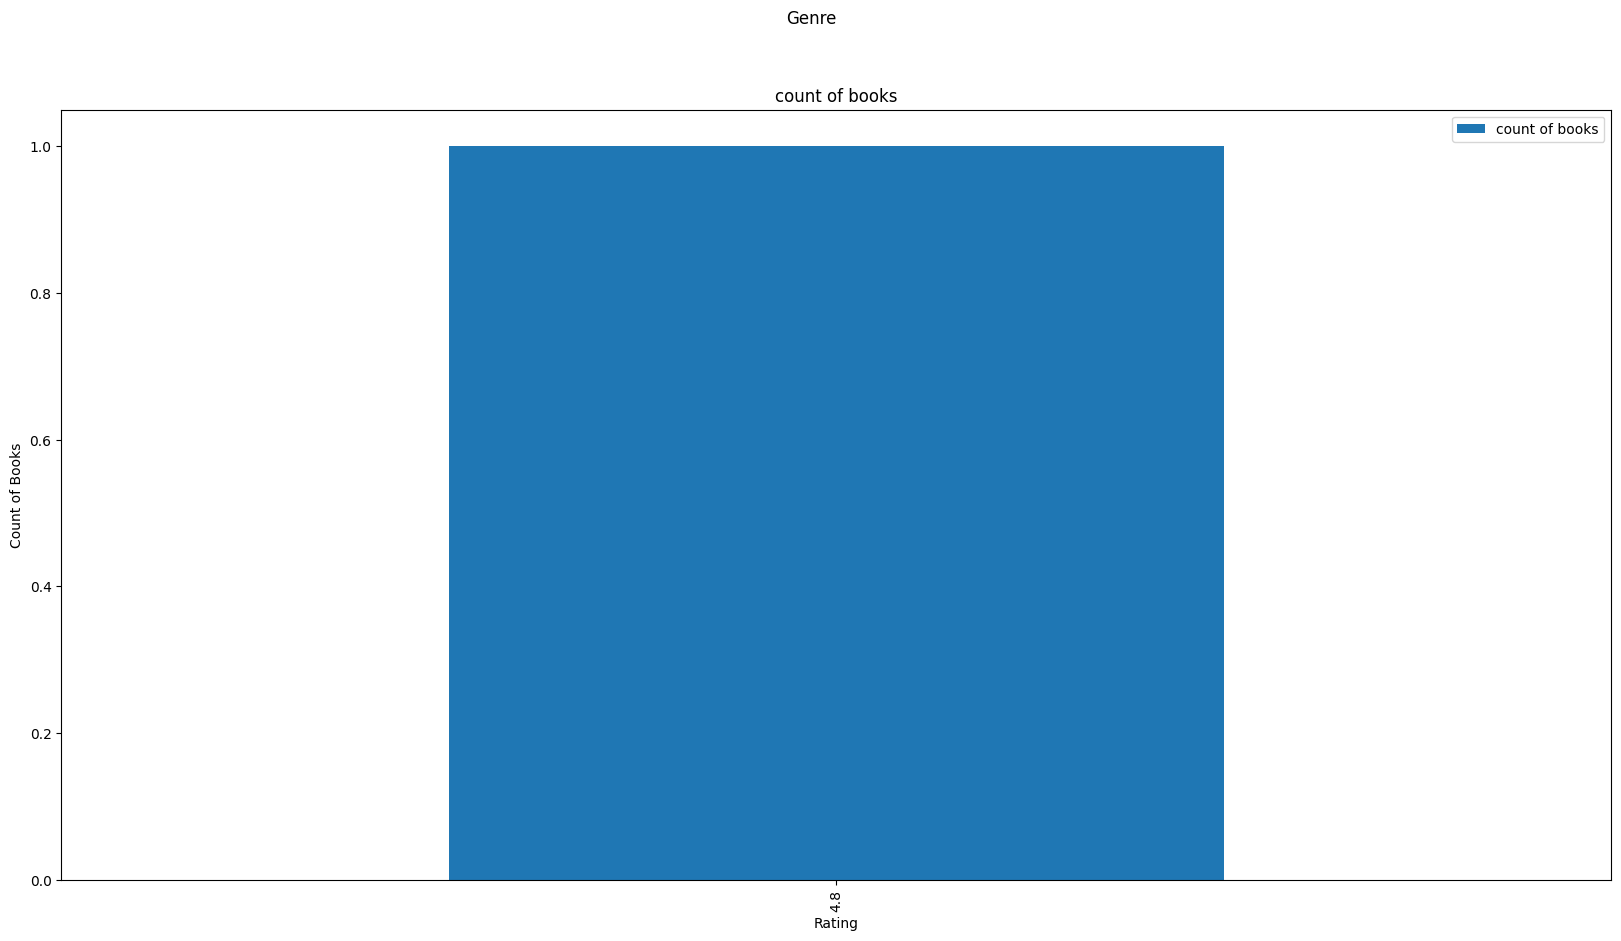

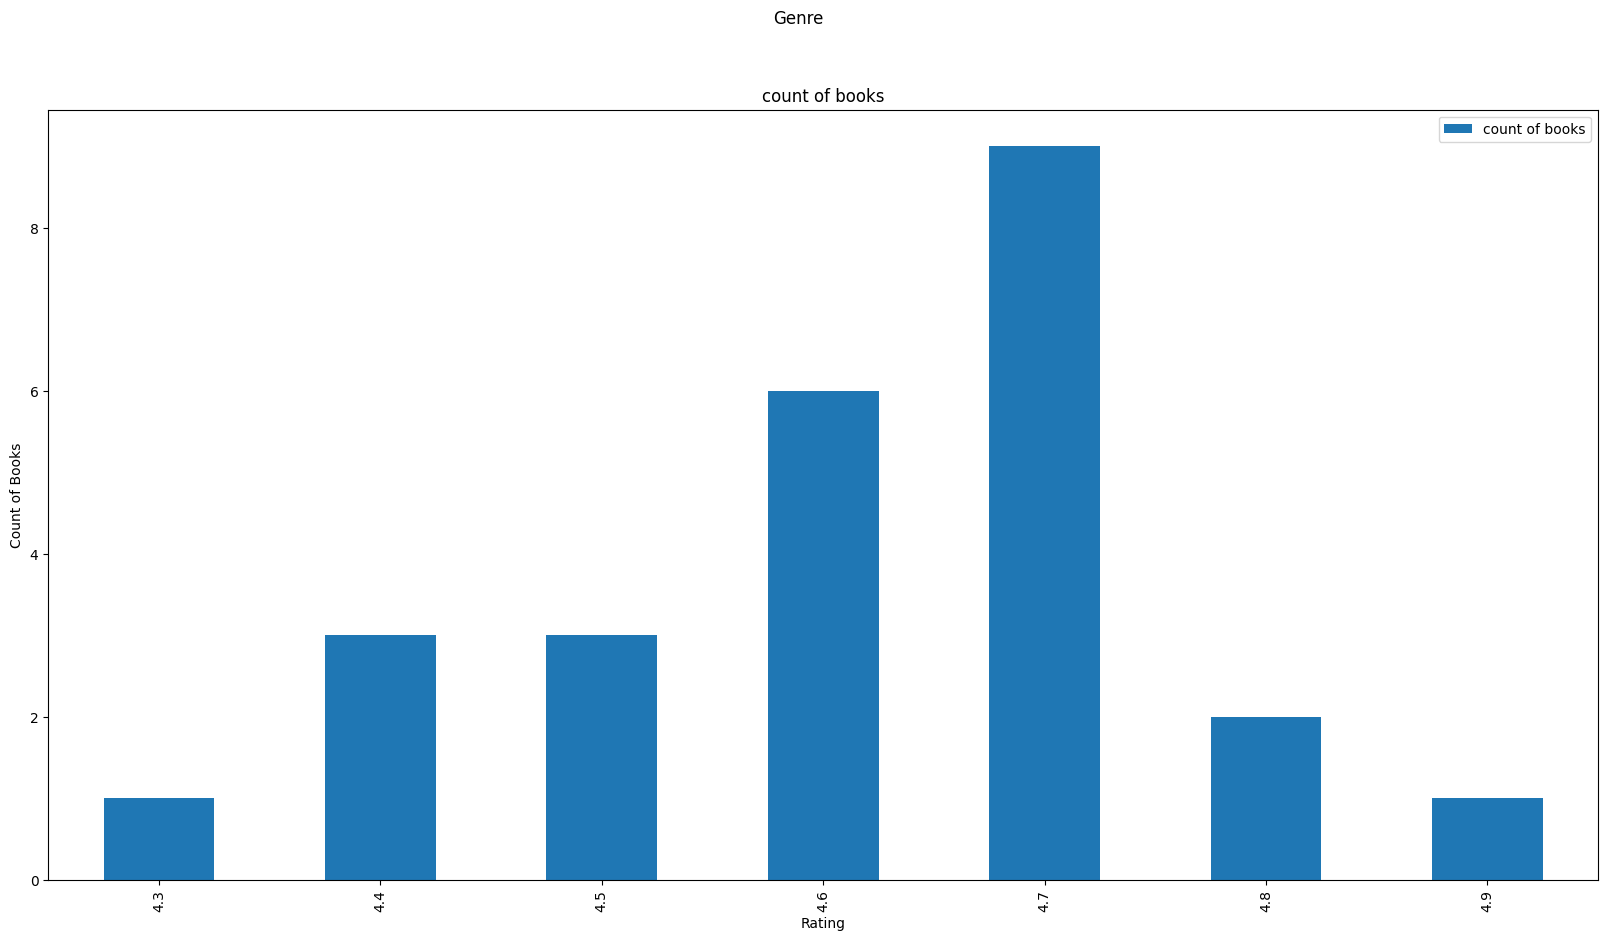

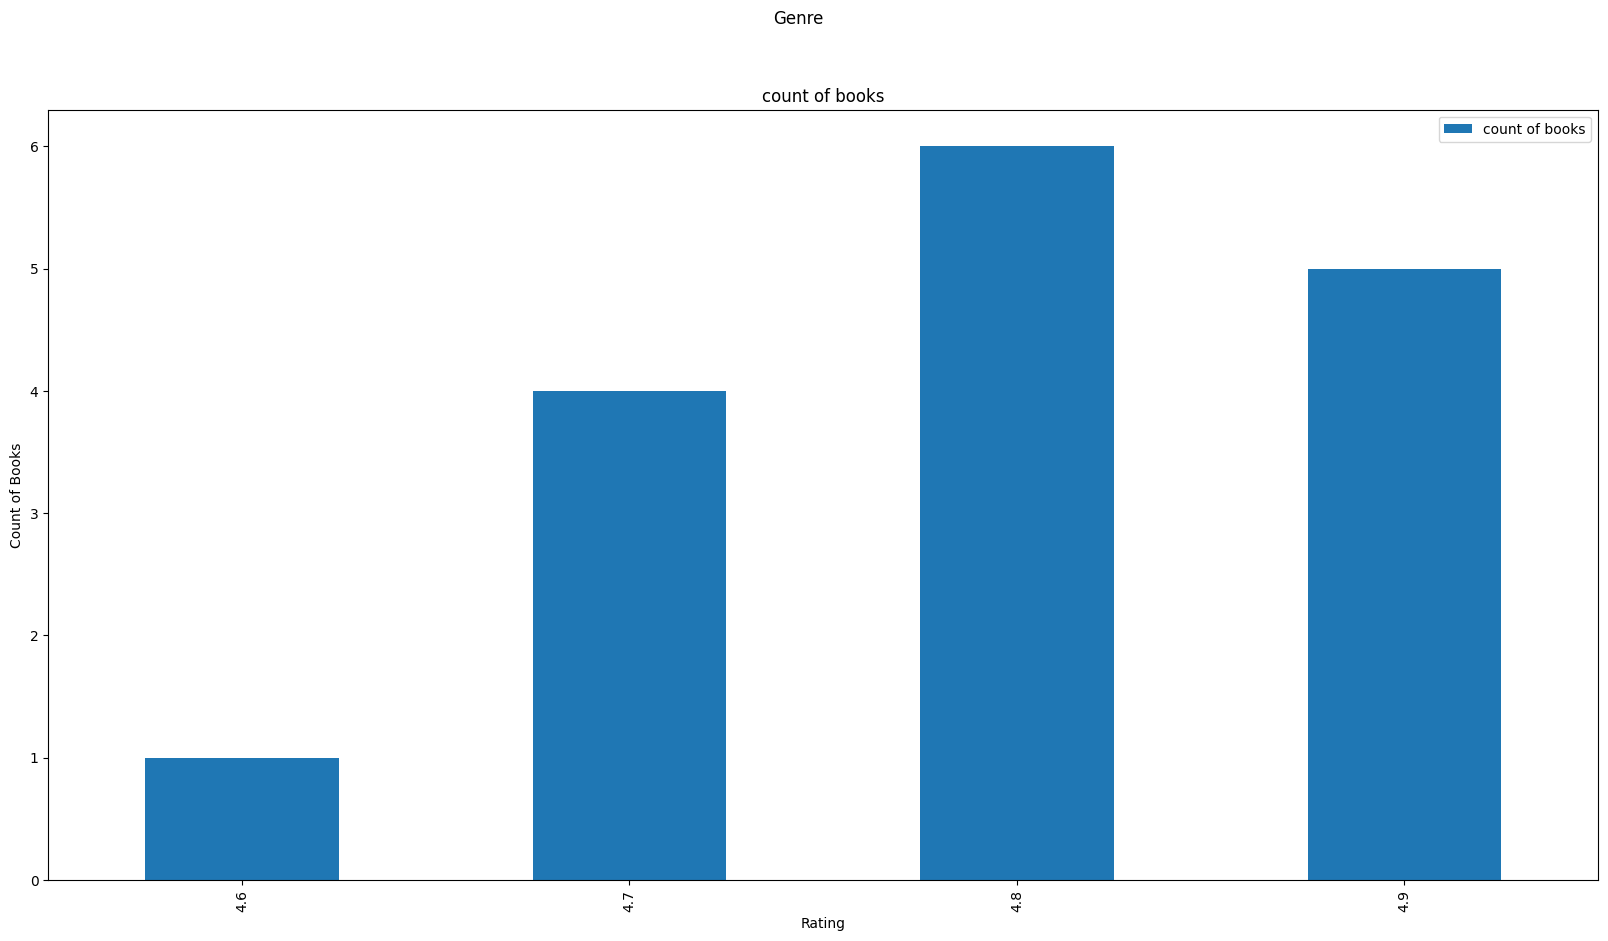

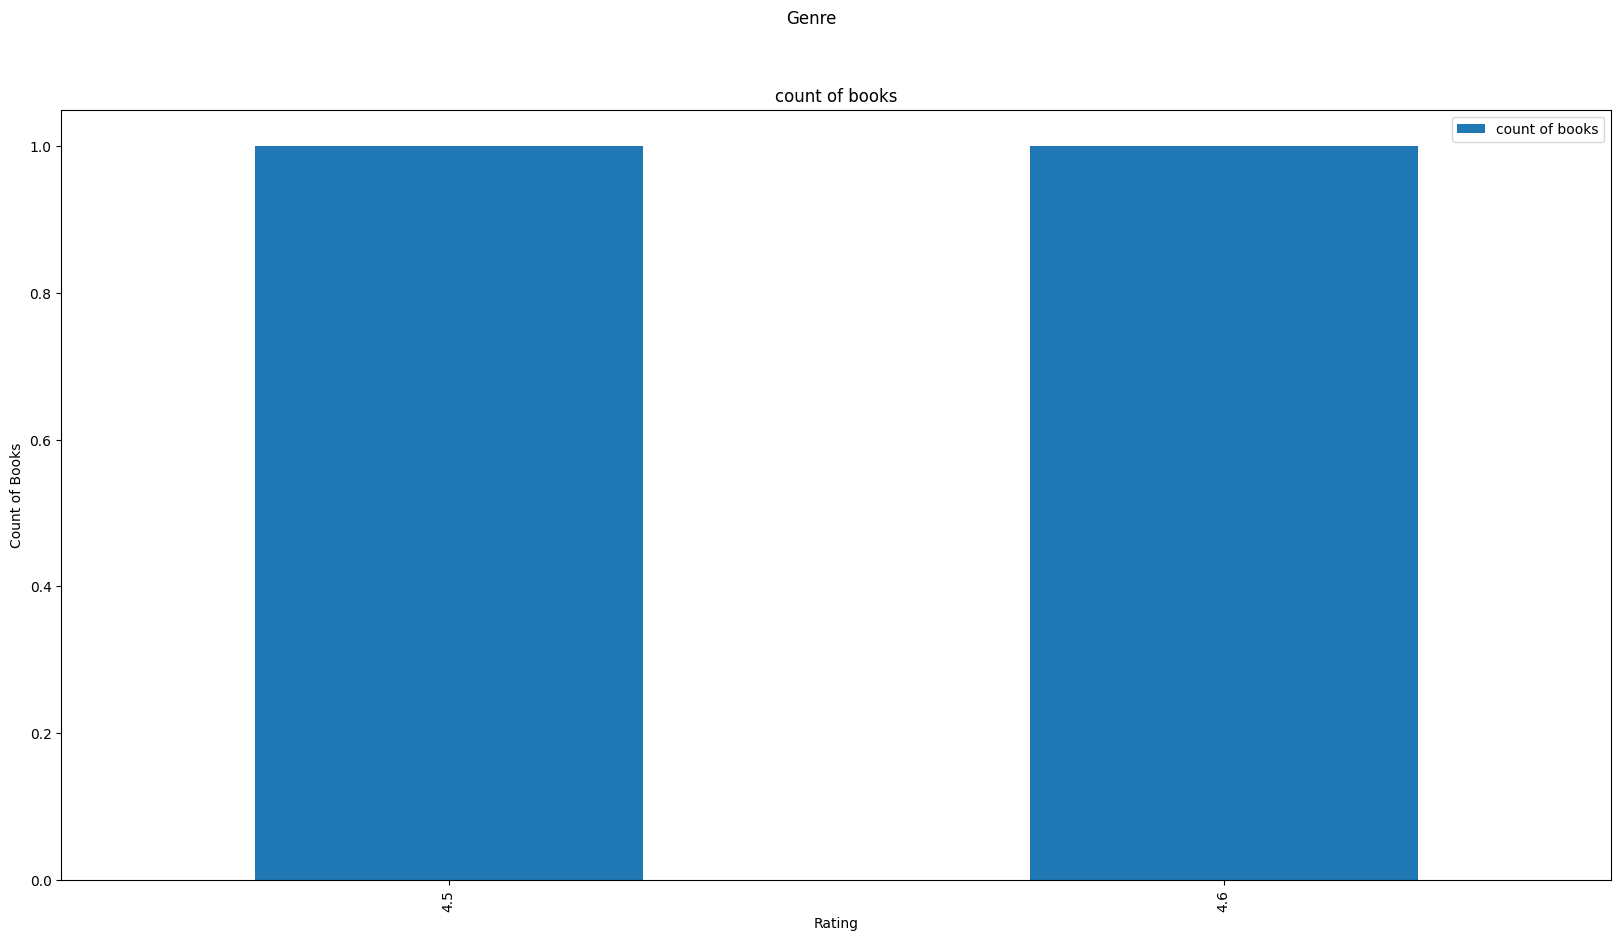

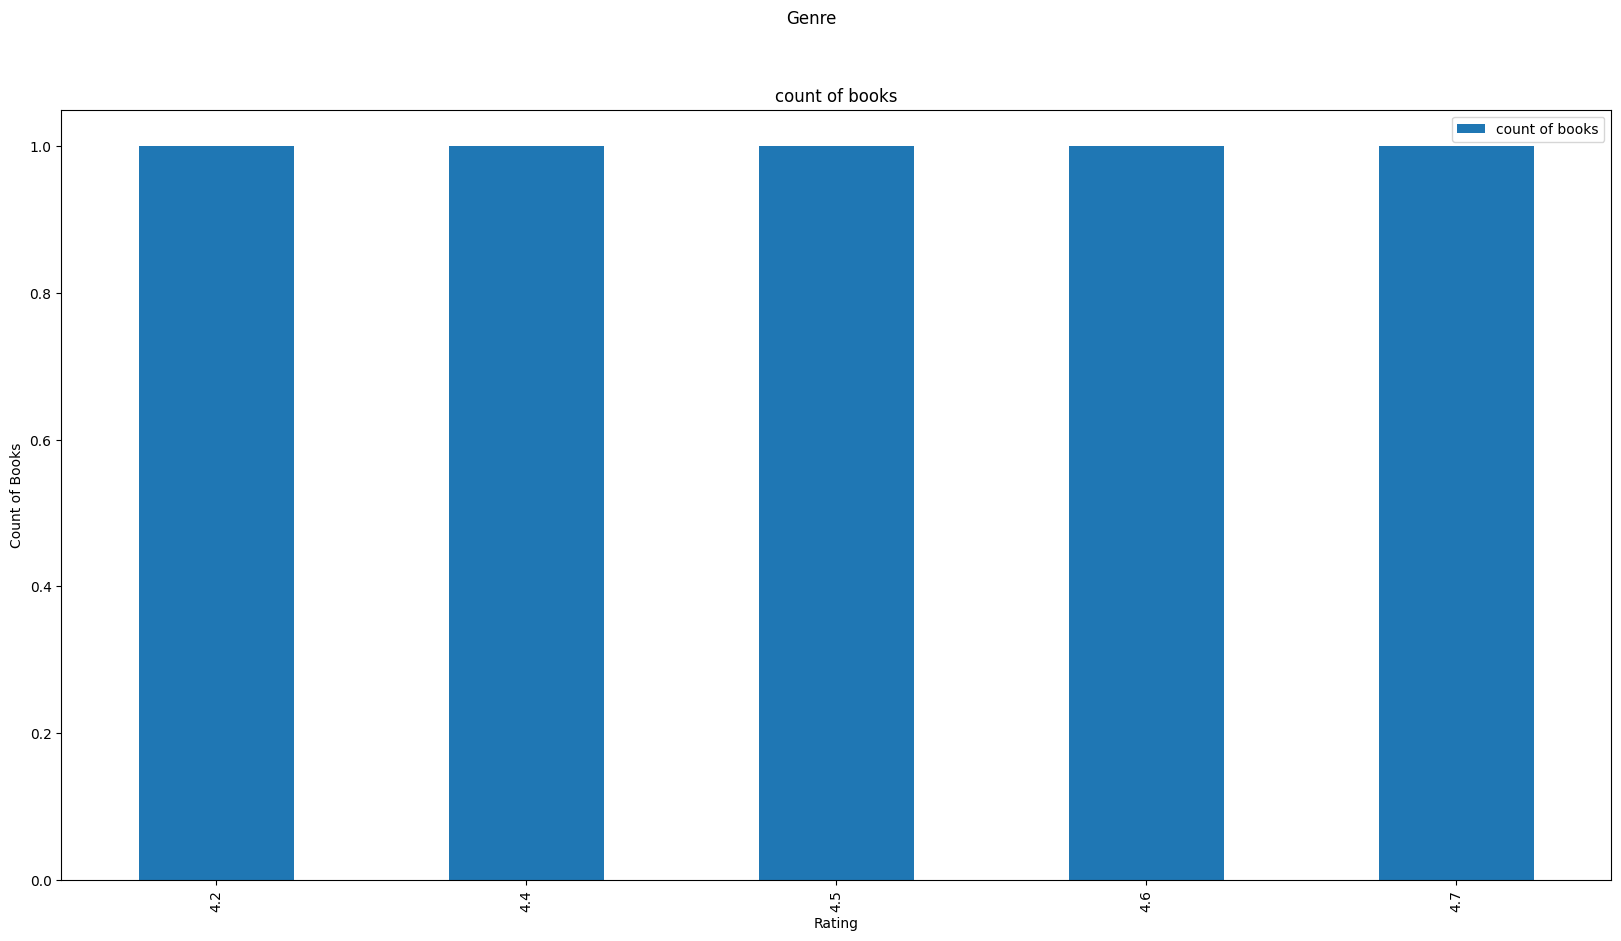

In [34]:
## IN PROGRESS

genre_rating_barplots = genre_rating.groupby('summarized genre').plot(
    x = 'rating',
    y = 'count of books',
    kind = 'bar',
    subplots = True,
    #layout = (2,2),
    title = 'Genre',
    ylabel = 'Count of Books',
    xlabel = 'Rating',
    figsize = (20,10)
)

## Top Authors

In [284]:
books['author'].describe()

count               100
unique               85
top       Sarah J. Maas
freq                  5
Name: author, dtype: object

<Axes: title={'center': 'Top Authors in Trending Books List'}, xlabel='Count of Books in Top 100 List', ylabel='Author'>

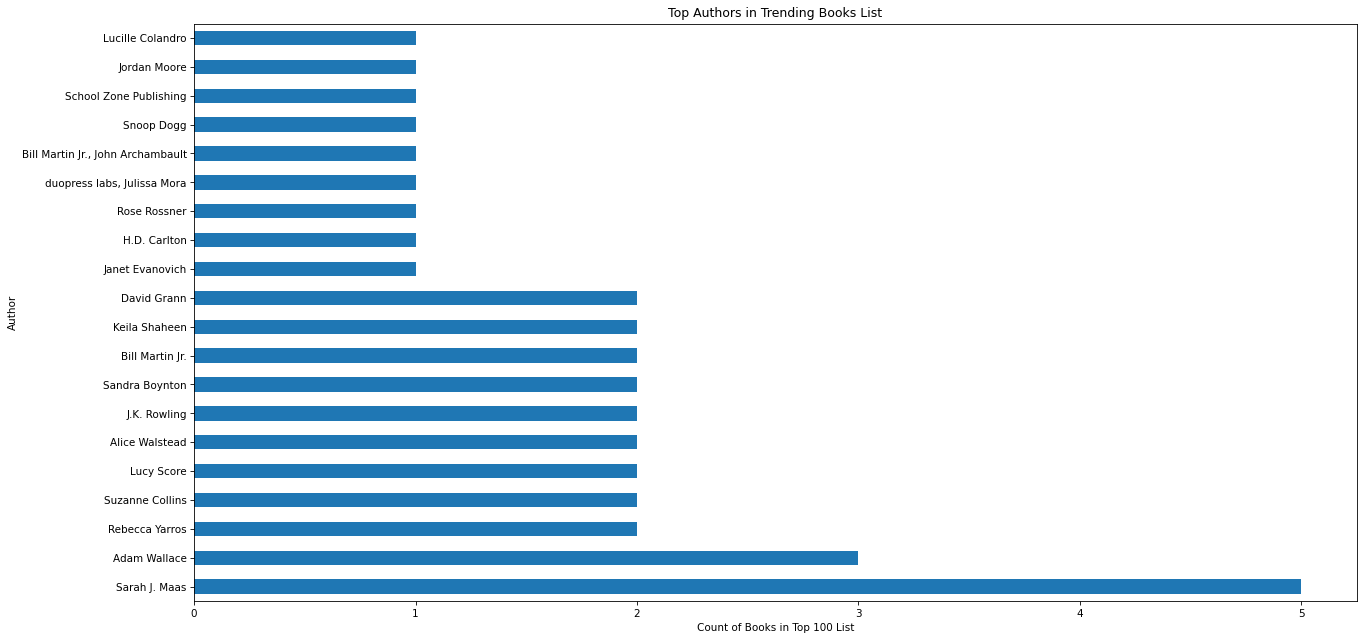

In [285]:
books['author'].value_counts()[:20].plot(
    kind = 'barh',
    title = 'Top Authors in Trending Books List',
    xlabel = 'Count of Books in Top 100 List',
    ylabel = 'Author',
    figsize = (20,10)
)

# For Tomorrow
Try using pivot tables and aggregations to do the above value counts. This way you can maybe filter the values down a bit more